In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("../dataset/이자보상배율최종.csv", encoding='cp949')
backtest_2011=pd.read_csv("../년도별 주식데이터/2011년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2012=pd.read_csv("../년도별 주식데이터/2012년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2013=pd.read_csv("../년도별 주식데이터/2013년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2014=pd.read_csv("../년도별 주식데이터/2014년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2015=pd.read_csv("../년도별 주식데이터/2015년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2016=pd.read_csv("../년도별 주식데이터/2016년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2017=pd.read_csv("../년도별 주식데이터/2017년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2018=pd.read_csv("../년도별 주식데이터/2018년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2019=pd.read_csv("../년도별 주식데이터/2019년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2020=pd.read_csv("../년도별 주식데이터/2020년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_kosdak=pd.read_csv("../년도별 주식데이터/코스닥주가.csv", encoding='cp949') 

In [6]:
for i in data.index:
    data.loc[i,"회계년도"]=data.loc[i,"회계년도"].replace('-12-', '-04-')
    data.loc[i,"상장일"]=data.loc[i,"상장일"].replace('-',"")
 
data.rename(columns={'회계년도':'투자일자'},inplace=True)
data

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.530000,2011,12,0
1,(주)CMG제약,58820,2012-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.750000,2012,12,0
2,(주)CMG제약,58820,2013-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.700000,2013,12,0
3,(주)CMG제약,58820,2014-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.600000,2014,12,0
4,(주)CMG제약,58820,2015-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.220000,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,흥구석유(주),24060,2016-04-01,19941207,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.660000,2016,12,0
10648,흥구석유(주),24060,2017-04-01,19941207,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.910000,2017,12,0
10649,흥구석유(주),24060,2018-04-01,19941207,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.660000,2018,12,0
10650,흥구석유(주),24060,2019-04-01,19941207,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.020000,2019,12,0


In [7]:
#logit 피처선정별 종류의 피처
data_mda = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]1주당순이익', '[제조]총자본투자효율','[제조]부가가치', '[제조]매출액순이익률', 
                 '[제조]자기자본배율', '[제조]총자본증가율','[제조]유형자산증가율',"[제조]유동비율",'[제조]비유동자산회전률','[제조]매입채무회전률' ]]
data_logit=data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]총자본증가율', '[제조]총자본사업이익률', '[제조]1주당매출액', 
                '[제조]비유동자산회전률', '[제조]매출채권회전률', '[제조]순운전자본회전률', '[제조]현금비율', '[제조]자기자본배율', '[제조]노동소득분배율','[제조]이자보상배율(이자비용)']]
data_lasso = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율','[제조]매출액순이익률',
                '[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_elastic = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율',
                     '[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_same = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]노동소득분배율','[제조]자기자본배율','[제조]현금비율','[제조]자기자본증가율',
                  '[제조]총자본증가율','[제조]재고자산증가율','[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]순운전자본회전률']]

In [8]:
# 투자 조건에 맞는 기업들을 오름차순 정렬
data_logit =data_logit.sort_values("[제조]노동소득분배율", ascending=False)
data_logit 

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
2985,(주)아이오케이컴퍼니,78860,2018-04-01,20060627,NaN,영상ㆍ오디오 기록물 제작 및 배급업,5,61.14,-4.56,223.80,0.40,9.08,0.48,10.41,445.51,116801.06,-1.13
3406,(주)에스엠코어,7820,2016-04-01,20111108,NaN,기타 기계 및 장비 제조업,5,-30.30,-19.26,3286.98,2.15,1.73,0.72,43.94,528.77,77866.64,-927.79
1785,(주)비엔지티,32790,2019-04-01,19970626,NaN,도매 및 상품 중개업,6,-19.69,-6.19,3055.34,2.48,6.04,1.07,29.40,263.90,22235.24,-1.80
5117,(주)인트로메딕,150840,2017-04-01,20131219,NaN,"의료, 정밀, 광학기기 및 시계 제조업",6,-13.86,-1.98,1250.90,1.84,1.52,0.33,110.21,302.13,14313.86,-0.90
5356,(주)제이엘케이,322510,2020-04-01,20191211,NaN,출판업,5,20.30,-17.20,299.52,0.30,37.98,0.15,602.20,2031.83,11615.82,-25.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,(주)바이오빌,65940,2018-04-01,20030107,2020-07-31,화학물질 및 화학제품 제조업; 의약품 제외,4,24.69,-11.74,3221.23,0.73,9.81,0.46,9.11,201.31,0.00,-2.41
1569,(주)바이오빌,65940,2019-04-01,20030107,2020-07-31,화학물질 및 화학제품 제조업; 의약품 제외,4,-48.51,-7.14,783.69,0.27,5.01,0.17,8.54,57.02,0.00,-8.31
8038,데브시스터즈(주),194480,2017-04-01,20141006,NaN,출판업,5,-4.73,-8.11,1585.36,0.68,5.69,0.14,229.70,2474.89,0.00,-4464.24
4044,(주)예당컴퍼니,49000,2012-04-01,20010103,2013-09-10,영상ㆍ오디오 기록물 제작 및 배급업,4,0.48,-7.26,50.70,0.24,3.13,0.16,8.37,270.82,0.00,-4.97


In [9]:
# 년도별로 분류
data_logit_2011 = data_logit[data_logit["투자일자"]=='2011-04-01']
data_logit_2012 = data_logit[data_logit["투자일자"]=='2012-04-01']
data_logit_2012["투자일자"] = "2012-04-02"
data_logit_2013 = data_logit[data_logit["투자일자"]=='2013-04-01']
data_logit_2014 = data_logit[data_logit["투자일자"]=='2014-04-01']
data_logit_2015 = data_logit[data_logit["투자일자"]=='2015-04-01']
data_logit_2016 = data_logit[data_logit["투자일자"]=='2016-04-01']
data_logit_2017 = data_logit[data_logit["투자일자"]=='2017-04-01']
data_logit_2017["투자일자"] = "2017-04-03"
data_logit_2018 = data_logit[data_logit["투자일자"]=='2018-04-01']
data_logit_2018["투자일자"] = "2018-04-02"
data_logit_2019 = data_logit[data_logit["투자일자"]=='2019-04-01']
data_logit_2020 = data_logit[data_logit["투자일자"]=='2020-04-01']


<ipython-input-9-3ce73cae502e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_logit_2012["투자일자"] = "2012-04-02"
<ipython-input-9-3ce73cae502e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_logit_2017["투자일자"] = "2017-04-03"
<ipython-input-9-3ce73cae502e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [10]:
data_logit_2011_buy=data_logit_2011[data_logit_2011["상장일"]<='20110401']
data_logit_2012_buy=data_logit_2012[data_logit_2012["상장일"]<='20120401']
data_logit_2013_buy=data_logit_2013[data_logit_2013["상장일"]<='20130401']
data_logit_2014_buy=data_logit_2014[data_logit_2014["상장일"]<='20140401']
data_logit_2015_buy=data_logit_2015[data_logit_2015["상장일"]<='20150401']
data_logit_2016_buy=data_logit_2016[data_logit_2016["상장일"]<='20160401']
data_logit_2017_buy=data_logit_2017[data_logit_2017["상장일"]<='20170401']
data_logit_2018_buy=data_logit_2018[data_logit_2018["상장일"]<='20180401']
data_logit_2019_buy=data_logit_2019[data_logit_2019["상장일"]<='20190401']
data_logit_2020_buy=data_logit_2020[data_logit_2020["상장일"]<='20200401']


In [11]:
# 해당기업 순위 20위 추출
data_logit_2011_buy=data_logit_2011_buy[:20]
data_logit_2012_buy=data_logit_2012_buy[:20]
data_logit_2013_buy=data_logit_2013_buy[:20]
data_logit_2014_buy=data_logit_2014_buy[:20]
data_logit_2015_buy=data_logit_2015_buy[:20]
data_logit_2016_buy=data_logit_2016_buy[:20]
data_logit_2017_buy=data_logit_2017_buy[:20]
data_logit_2018_buy=data_logit_2018_buy[:20]
data_logit_2019_buy=data_logit_2019_buy[:20]
data_logit_2020_buy=data_logit_2020_buy[:20]

In [12]:
#트레이드 조건 주기
data_logit_2011_buy["trade"]="buy"
data_logit_2012_buy["trade"]="buy"
data_logit_2013_buy["trade"]="buy"
data_logit_2014_buy["trade"]="buy"
data_logit_2015_buy["trade"]="buy"
data_logit_2016_buy["trade"]="buy"
data_logit_2017_buy["trade"]="buy"
data_logit_2018_buy["trade"]="buy"
data_logit_2019_buy["trade"]="buy"
data_logit_2020_buy["trade"]="buy"

In [13]:
stock_2011 = pd.merge(backtest_2011,data_logit_2011_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2012 = pd.merge(backtest_2012,data_logit_2012_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2013 = pd.merge(backtest_2013,data_logit_2013_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2014 = pd.merge(backtest_2014,data_logit_2014_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2015 = pd.merge(backtest_2015,data_logit_2015_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2016 = pd.merge(backtest_2016,data_logit_2016_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2017 = pd.merge(backtest_2017,data_logit_2017_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2018 = pd.merge(backtest_2018,data_logit_2018_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2019 = pd.merge(backtest_2019,data_logit_2019_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2020 = pd.merge(backtest_2020,data_logit_2020_buy, how='left',on=['회사명','투자일자','거래소코드'])

In [14]:
stock_2011[stock_2011["trade"]=="buy"]

,index,회사명,거래소코드,투자일자,종가,일일수익률,상장일,상장폐지일,산업명,소속코드,...,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),trade
31289,53425,(주)바이오빌,65940,2011-04-01,8068,0.127288,20030107,2020-07-31,화학물질 및 화학제품 제조업; 의약품 제외,4.0,...,-5.74,2159.22,0.71,8.77,1.11,79.36,772.91,338.64,-8.690000,buy
53924,53655,(주)쎄니트,37760,2011-04-01,1060,-0.027523,20000407,NaN,1차 금속 제조업,5.0,...,-2.82,2234.50,1.11,5.74,0.78,4.65,201.27,409.71,3.477778,buy
56527,53614,(주)씨엘인터내셔널,37340,2011-04-01,3050,-0.004894,19991214,2016-09-08,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",4.0,...,-8.39,593.66,0.62,4.17,0.49,14.12,150.68,3220.47,-1.820000,buy
59599,53303,(주)아미노로직스,74430,2011-04-01,6293,-0.013018,20040604,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5.0,...,-10.87,379.64,0.54,11.04,0.28,23.89,1187.09,972.30,-10.380000,buy
67140,53151,(주)에듀언스,9010,2011-04-01,28541,-0.016133,19931229,2013-05-01,교육 서비스업,4.0,...,-27.70,905.74,0.92,170.83,0.54,1.86,97.45,1604.63,-4.960000,buy
77418,53458,(주)에이프로젠헬스케어앤게임즈,109960,2011-04-01,809,-0.081725,20091113,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5.0,...,-17.99,6820.32,5.70,4.10,1.03,26.89,462.97,579.29,-21.050000,buy
79668,53980,(주)엑큐리스,48460,2011-04-01,546,0.016760,20001214,2012-11-16,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",4.0,...,-17.08,3106.72,3.69,6.12,1.28,10.99,177.42,532.76,-7.590000,buy
88125,53740,(주)오스코텍,39200,2011-04-01,2521,0.010826,20070117,NaN,의료용 물질 및 의약품 제조업,5.0,...,1.79,1634.21,1.02,5.77,0.69,3.59,318.62,364.18,0.550000,buy
94654,53610,(주)웨이브일렉트로닉스,95270,2011-04-01,5208,0.000000,20070912,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5.0,...,-13.52,3647.73,2.07,7.89,0.93,28.36,569.75,3208.93,-15.270000,buy
115810,54003,(주)제이웨이,58420,2011-04-01,19152,-0.024996,20020110,NaN,영상ㆍ오디오 기록물 제작 및 배급업,6.0,...,-23.94,876.52,1.34,8.38,1.88,9.48,118.39,344.91,-34.740000,buy


In [15]:
list =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]
list_grn =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]


In [17]:
for i in range(len(list)):
    for j in list[i].index:
        if j>0:
            if list[i].loc[j-1,"trade"] == "buy":
                list[i].loc[j,"trade"] = "hold"
            elif  list[i].loc[j-1,"trade"] == "hold":
                if list[i].iloc[:,1][j] == list[i].iloc[:,1][j+1]:
                    list[i].loc[j,"trade"] = "hold"
                elif list[i].iloc[:,1][j] != list[i].iloc[:,1][j+1]:
                    list[i].loc[j,"trade"] = "sell"
                        
for i in range(len(list)):
    list[i] = list[i][["회사명","거래소코드","투자일자","종가","일일수익률","trade"]]
    list[i] = list[i].dropna()
    list[i] = list[i].sort_values('투자일자', ascending=True)
    list[i] = list[i].reset_index(drop='index')
    list[i] = list[i].groupby("투자일자")["일일수익률"].sum()/20

In [18]:
# acc_rtn2= 1
# for i in range(len(list)):
#     list[i]=list[i].reset_index()
#     for j in list[i].index:
        
#         list[i].loc[j,"연누적수익률"] = acc_rtn2*list[i].loc[j,"일일수익률"]
#         acc_rtn2 = list[i].loc[j,"연누적수익률"]

In [19]:
# list[1]

In [20]:
#각 년도별 수익률 합치기
rtn =pd.concat(list)
rtn = pd.DataFrame(rtn)

In [21]:
#리밸런싱 날짜는 수익률 반영을 못하므로 제거
rtn["일일수익률"] =rtn["일일수익률"]*100
rtn =rtn.drop(index=["2011-04-01","2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
stock_rtn=rtn.reset_index()

In [22]:
stock_rtn=rtn.reset_index()
stock_rtn.columns=["투자일자","일일수익률(%)"]
stock_rtn["일일수익률"] =(stock_rtn["일일수익률(%)"]/100) +1
stock_rtn

,투자일자,일일수익률(%),일일수익률
0,2011-04-04,2.641519,1.026415
1,2011-04-05,0.152240,1.001522
2,2011-04-06,-1.549950,0.984500
3,2011-04-07,-1.660893,0.983391
4,2011-04-08,-0.402908,0.995971
...,...,...,...
2448,2021-03-25,-0.429303,0.995707
2449,2021-03-26,2.988273,1.029883
2450,2021-03-29,1.308412,1.013084
2451,2021-03-30,1.378540,1.013785


In [23]:
# stock_rtn[stock_rtn["투자일자"]=='2012-03-30']248
# stock_rtn[stock_rtn["투자일자"]=='2013-03-29'] 494
# stock_rtn[stock_rtn["투자일자"]=='2014-03-31'] 740
# stock_rtn[stock_rtn["투자일자"]=='2015-03-31'] 983
# stock_rtn[stock_rtn["투자일자"]=='2016-03-31'] 1230
# stock_rtn[stock_rtn["투자일자"]=='2017-03-31'] 1477
# stock_rtn[stock_rtn["투자일자"]=='2018-03-30'] 1718
# stock_rtn[stock_rtn["투자일자"]=='2019-03-29'] 1959
# stock_rtn[stock_rtn["투자일자"]=='2020-03-31'] 2207
# stock_rtn[stock_rtn["투자일자"]=='2021-03-31'] 2452


In [24]:
acc_rtn=1
for i in stock_rtn.index:
    
    stock_rtn.loc[i,"누적수익률"] = acc_rtn*stock_rtn.loc[i,"일일수익률"]
    acc_rtn = stock_rtn.loc[i,"누적수익률"]
        

acc_rtn_1 = 1
for i in stock_rtn.index:
    if i <= 248:
        
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_1*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_1 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 1
        
acc_rtn_2 = 1
for i in stock_rtn.index:
    if 248 < i <= 494:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_2*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_2 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 2
        
acc_rtn_3 = 1        
for i in stock_rtn.index:
    if  494< i <=740:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_3*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_3 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 3
        
acc_rtn_4 = 1       
for i in stock_rtn.index:
    if 740 < i <= 983:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_4*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_4 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 4
        
acc_rtn_5 = 1       
for i in stock_rtn.index:
    if  983< i <= 1230:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_5*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_5 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 5

acc_rtn_6 = 1
for i in stock_rtn.index:
    if 1230 < i <= 1477:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_6*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_6 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 6
        
acc_rtn_7 = 1
for i in stock_rtn.index:
    if 1477 < i <= 1718:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_7*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_7 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 7

acc_rtn_8 = 1
for i in stock_rtn.index:
    if 1718 < i <= 1959:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_8*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_8 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 8   
             
acc_rtn_9 = 1      
for i in stock_rtn.index:
    if 1959 < i <= 2207:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_9*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_9 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 9
        
acc_rtn_10 = 1       
for i in stock_rtn.index:
    if 2207 < i <= 2452:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_10*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_10 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 10
    

In [25]:
#코스닥 시작 데이터 61
# backtest_kosdak[backtest_kosdak["날짜"]=="2011-04-04"]
#코스닥 마지막 데이터 2522
#backtest_kosdak[backtest_kosdak["날짜"]=="2021-03-31"]

In [26]:
#코스닥 데이터 끌고오기
backtest_kosdak_buy= backtest_kosdak[61:2523]
backtest_kosdak_rtn = backtest_kosdak_buy.set_index("날짜")

In [27]:
backtest_kosdak_rtn =backtest_kosdak_rtn.drop(index=["2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
backtest_kosdak_rtn=backtest_kosdak_rtn.reset_index()

In [28]:
backtest_kosdak_rtn.columns = ["투자일자","코스닥종가","시가총액","코스닥수익률","코스닥시총수익률"]

In [29]:
#주식수익률과 코스닥 merge
stock_rtn_all = pd.merge(stock_rtn,backtest_kosdak_rtn,how="left",on="투자일자")


In [30]:
stock_rtn_all["코스닥수익률"]=stock_rtn_all["코스닥수익률"]*100


In [31]:
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률
0,2011-04-04,2.641519,1.026415,1.026415,1.026415,1.0,534.90,105835314871792,0.533774,0.005763
1,2011-04-05,0.152240,1.001522,1.027978,1.027978,1.0,537.66,106138352312272,0.515984,0.002863
2,2011-04-06,-1.549950,0.984500,1.012045,1.012045,1.0,533.98,105387016008919,-0.684447,-0.007079
3,2011-04-07,-1.660893,0.983391,0.995236,0.995236,1.0,534.97,105571037939827,0.185400,0.001746
4,2011-04-08,-0.402908,0.995971,0.991226,0.991226,1.0,534.20,105439281631189,-0.143933,-0.001248
...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-0.429303,0.995707,2.059936,2.103774,10.0,954.99,387311921085308,0.122665,0.001147
2449,2021-03-26,2.988273,1.029883,2.121492,2.166640,10.0,956.70,388051677647507,0.179059,0.001910
2450,2021-03-29,1.308412,1.013084,2.149250,2.194989,10.0,954.10,386977420485060,-0.271768,-0.002768
2451,2021-03-30,1.378540,1.013785,2.178879,2.225248,10.0,958.06,388660278311558,0.415051,0.004349


In [32]:

stock_rtn_all["코스닥수익률(%)"]= stock_rtn_all["코스닥수익률"]
stock_rtn_all["코스닥일일수익률"] =(stock_rtn_all["코스닥수익률(%)"]/100) +1
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률
0,2011-04-04,2.641519,1.026415,1.026415,1.026415,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338
1,2011-04-05,0.152240,1.001522,1.027978,1.027978,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160
2,2011-04-06,-1.549950,0.984500,1.012045,1.012045,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156
3,2011-04-07,-1.660893,0.983391,0.995236,0.995236,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854
4,2011-04-08,-0.402908,0.995971,0.991226,0.991226,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561
...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-0.429303,0.995707,2.059936,2.103774,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227
2449,2021-03-26,2.988273,1.029883,2.121492,2.166640,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791
2450,2021-03-29,1.308412,1.013084,2.149250,2.194989,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282
2451,2021-03-30,1.378540,1.013785,2.178879,2.225248,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151


In [33]:
acc_rtn=1
for i in stock_rtn_all.index:
    
    stock_rtn_all.loc[i,'코스닥누적수익률'] = acc_rtn*stock_rtn_all.loc[i,"코스닥일일수익률"]
    acc_rtn = stock_rtn_all.loc[i,"코스닥누적수익률"]
    
    
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률
0,2011-04-04,2.641519,1.026415,1.026415,1.026415,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338,1.005338
1,2011-04-05,0.152240,1.001522,1.027978,1.027978,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160,1.010525
2,2011-04-06,-1.549950,0.984500,1.012045,1.012045,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156,1.003609
3,2011-04-07,-1.660893,0.983391,0.995236,0.995236,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854,1.005469
4,2011-04-08,-0.402908,0.995971,0.991226,0.991226,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561,1.004022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-0.429303,0.995707,2.059936,2.103774,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227,1.777700
2449,2021-03-26,2.988273,1.029883,2.121492,2.166640,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791,1.780883
2450,2021-03-29,1.308412,1.013084,2.149250,2.194989,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282,1.776043
2451,2021-03-30,1.378540,1.013785,2.178879,2.225248,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151,1.783415


In [34]:

for i in stock_rtn_all.index:
    if stock_rtn_all.iloc[:,5][i] == 1:
        stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥누적수익률"]
        
    elif stock_rtn_all.iloc[:,5][i] != 1:
        if stock_rtn_all.iloc[:,5][i] == stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i-1,"코스닥연누적수익률"]*stock_rtn_all.loc[i,"코스닥일일수익률"]
            
        elif stock_rtn_all.iloc[:,5][i] != stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥일일수익률"]
            
                

    

In [35]:
stock_rtn_all.iloc[:,5]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
2448    10.0
2449    10.0
2450    10.0
2451    10.0
2452    10.0
Name: 투자연차, Length: 2453, dtype: float64

In [36]:
stock_rtn_all[490:505]

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률,코스닥연누적수익률
490,2013-03-25,0.125316,1.001253,0.857162,0.852440,2.0,549.56,122836307769308,-0.306576,-0.002275,-0.306576,0.996934,1.028457,1.053200
491,2013-03-26,0.466636,1.004666,0.861161,0.856418,2.0,549.90,122920014052292,0.061868,0.000681,0.061868,1.000619,1.029093,1.053852
492,2013-03-27,-0.750957,0.992490,0.854694,0.849986,2.0,548.72,122659767622917,-0.214584,-0.002117,-0.214584,0.997854,1.026885,1.051591
493,2013-03-28,-0.501994,0.994980,0.850404,0.845720,2.0,552.64,123537571806713,0.714390,0.007156,0.714390,1.007144,1.034221,1.059103
494,2013-03-29,0.155389,1.001554,0.851725,0.847034,2.0,555.02,124020587600936,0.430660,0.003910,0.430660,1.004307,1.038675,1.063664
495,2013-04-02,-0.845753,0.991542,0.844522,0.991542,3.0,552.83,123545583208574,-0.205787,-0.002124,-0.205787,0.997942,1.036537,0.997942
496,2013-04-03,-0.653651,0.993463,0.839002,0.985061,3.0,557.96,124727364942628,0.927953,0.009566,0.927953,1.009280,1.046156,1.007203
497,2013-04-04,-2.649679,0.973503,0.816771,0.958960,3.0,555.23,124124104831224,-0.489282,-0.004837,-0.489282,0.995107,1.041037,1.002274
498,2013-04-05,-1.544117,0.984559,0.804159,0.944153,3.0,547.51,122387758967786,-1.390415,-0.013989,-1.390415,0.986096,1.026563,0.988339
499,2013-04-08,-2.619215,0.973808,0.783096,0.919423,3.0,528.78,118098161236530,-3.420942,-0.035049,-3.420942,0.965791,0.991445,0.954528


In [37]:
stock_rtn_all["코스닥연누적수익률(%)"]=(stock_rtn_all["코스닥연누적수익률"]-1)*100
stock_rtn_all["누적수익률(%)"]= (stock_rtn_all["누적수익률"]-1)*100
stock_rtn_all["코스닥누적수익률(%)"]= (stock_rtn_all["코스닥누적수익률"]-1)*100
stock_rtn_all["연누적수익률(%)"]= (stock_rtn_all["연누적수익률"]-1)*100


In [38]:
stock_rtn_all =stock_rtn_all[['투자일자', '일일수익률(%)',"누적수익률(%)","연누적수익률(%)", '코스닥종가', '코스닥수익률(%)', '코스닥누적수익률(%)',"코스닥연누적수익률(%)",'투자연차']]


In [39]:
stock_rtn_all

,투자일자,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
0,2011-04-04,2.641519,2.641519,2.641519,534.90,0.533774,0.533774,0.533774,1.0
1,2011-04-05,0.152240,2.797780,2.797780,537.66,0.515984,1.052513,1.052513,1.0
2,2011-04-06,-1.549950,1.204466,1.204466,533.98,-0.684447,0.360862,0.360862,1.0
3,2011-04-07,-1.660893,-0.476432,-0.476432,534.97,0.185400,0.546931,0.546931,1.0
4,2011-04-08,-0.402908,-0.877421,-0.877421,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-0.429303,105.993589,110.377384,954.99,0.122665,77.769983,73.055596,10.0
2449,2021-03-26,2.988273,112.149239,116.664034,956.70,0.179059,78.088297,73.365468,10.0
2450,2021-03-29,1.308412,114.925026,119.498892,954.10,-0.271768,77.604311,72.894317,10.0
2451,2021-03-30,1.378540,117.887853,122.524773,958.06,0.415051,78.341459,73.611916,10.0


In [40]:
# 전략누적수익률의 표준편차를 계산한다
Std = (stock_rtn_all["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( stock_rtn_all["일일수익률(%)"] - stock_rtn_all["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print( 'Sharpe ratio: %.2f' % Sharpe )

Sharpe ratio: 0.01


In [41]:
Sharpe *np.sqrt(252)

0.11743077733982035

In [42]:
#mdd 
((100+stock_rtn_all["누적수익률(%)"].min())-(100+stock_rtn_all["누적수익률(%)"].max()))/(stock_rtn_all["누적수익률(%)"].max()+100)

-0.7289057270026302

In [43]:
cagr = (stock_rtn_all
        ["누적수익률(%)"]**(1/10))-1
print(cagr*100)

0       10.200959
1       10.836132
2        1.877774
3             NaN
4             NaN
          ...    
2448    59.414551
2449    60.317021
2450    60.709467
2451    61.119055
2452    61.381686
Name: 누적수익률(%), Length: 2453, dtype: float64


In [44]:
Std

1.5773558867722521

In [45]:
stock_rtn_all=stock_rtn_all.set_index('투자일자')

In [46]:
rtn_2011 = stock_rtn_all[stock_rtn_all["투자연차"]==1]
rtn_2012 = stock_rtn_all[stock_rtn_all["투자연차"]==2]
rtn_2013 = stock_rtn_all[stock_rtn_all["투자연차"]==3]
rtn_2014 = stock_rtn_all[stock_rtn_all["투자연차"]==4]
rtn_2015 = stock_rtn_all[stock_rtn_all["투자연차"]==5]
rtn_2016 = stock_rtn_all[stock_rtn_all["투자연차"]==6]
rtn_2017 = stock_rtn_all[stock_rtn_all["투자연차"]==7]
rtn_2018 = stock_rtn_all[stock_rtn_all["투자연차"]==8]
rtn_2019 = stock_rtn_all[stock_rtn_all["투자연차"]==9]
rtn_2020 = stock_rtn_all[stock_rtn_all["투자연차"]==10]

In [47]:
rtn_2011

,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,2.641519,2.641519,2.641519,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,0.152240,2.797780,2.797780,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,-1.549950,1.204466,1.204466,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,-1.660893,-0.476432,-0.476432,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,-0.402908,-0.877421,-0.877421,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,1.224548,4.365199,4.365199,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,-1.308033,3.000068,3.000068,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,-1.460294,1.495964,1.495964,519.56,-0.417833,-2.349359,-2.349359,1.0


In [49]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2011["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2011["일일수익률(%)"] - rtn_2011["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2011["누적수익률(%)"].min())-(100+rtn_2011["누적수익률(%)"].max()))/(rtn_2011["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2011


-0.3394010124652817
2.062134378617225
Sharpe ratio: 0.01
0.13789326876538585


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,2.641519,2.641519,2.641519,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,0.152240,2.797780,2.797780,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,-1.549950,1.204466,1.204466,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,-1.660893,-0.476432,-0.476432,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,-0.402908,-0.877421,-0.877421,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,1.224548,4.365199,4.365199,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,-1.308033,3.000068,3.000068,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,-1.460294,1.495964,1.495964,519.56,-0.417833,-2.349359,-2.349359,1.0


In [50]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2012["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2012["일일수익률(%)"] - rtn_2012["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2012["누적수익률(%)"].min())-(100+rtn_2012["누적수익률(%)"].max()))/(rtn_2012["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2012


-0.2675903887649983
1.2917005375915656
Sharpe ratio: -0.07
-1.103218332035018


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2012-04-03,-0.479905,0.071332,-0.479905,515.83,-1.144117,-3.466596,-1.144117,2.0
2012-04-04,-1.466685,-1.396400,-1.939551,502.97,-2.493069,-5.873241,-3.608662,2.0
2012-04-05,0.966768,-0.443132,-0.991534,503.34,0.073563,-5.803998,-3.537754,2.0
2012-04-06,-0.429476,-0.870705,-1.416752,503.41,0.013907,-5.790899,-3.524339,2.0
2012-04-09,-2.638787,-3.486516,-4.018154,486.80,-3.299497,-8.899325,-6.707551,2.0
...,...,...,...,...,...,...,...,...
2013-03-25,0.125316,-14.283839,-14.756001,549.56,-0.306576,2.845700,5.320046,2.0
2013-03-26,0.466636,-13.883857,-14.358221,549.90,0.061868,2.909328,5.385205,2.0
2013-03-27,-0.750957,-14.530552,-15.001355,548.72,-0.214584,2.688501,5.159065,2.0


In [51]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2013["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2013["일일수익률(%)"] - rtn_2013["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2013["누적수익률(%)"].min())-(100+rtn_2013["누적수익률(%)"].max()))/(rtn_2013["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2013

-0.2553416505284173
1.1021677696773287
Sharpe ratio: -0.03
-0.47491143905532723


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2013-04-02,-0.845753,-15.547810,-0.845753,552.83,-0.205787,3.653749,-0.205787,3.0
2013-04-03,-0.653651,-16.099832,-1.493876,557.96,0.927953,4.615606,0.720256,3.0
2013-04-04,-2.649679,-18.322917,-4.103971,555.23,-0.489282,4.103740,0.227449,3.0
2013-04-05,-1.544117,-19.584106,-5.584718,547.51,-1.390415,2.656267,-1.166128,3.0
2013-04-08,-2.619215,-21.690371,-8.057657,528.78,-3.420942,-0.855545,-4.547178,3.0
...,...,...,...,...,...,...,...,...
2014-03-25,-1.437090,-24.685357,-11.574031,539.05,-1.200513,1.070045,-2.693287,3.0
2014-03-26,-0.384463,-24.974914,-11.913997,544.13,0.942399,2.022528,-1.776269,3.0
2014-03-27,-0.289610,-25.192194,-12.169103,541.46,-0.490692,1.521912,-2.258245,3.0


In [52]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2014["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2014["일일수익률(%)"] - rtn_2014["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2014["누적수익률(%)"].min())-(100+rtn_2014["누적수익률(%)"].max()))/(rtn_2014["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2014

-0.30472461200281614
1.134378334130446
Sharpe ratio: -0.02
-0.2958124682958582


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2014-04-02,1.788726,-21.973733,1.788726,557.65,1.560793,3.129309,1.560793,4.0
2014-04-03,0.582191,-21.519471,2.381331,557.01,-0.114767,3.010951,1.444234,4.0
2014-04-04,0.003044,-21.517082,2.384448,560.44,0.615788,3.645280,2.068915,4.0
2014-04-07,-0.360232,-21.799802,2.015627,554.23,-1.108058,2.496830,0.937933,4.0
2014-04-08,-0.869640,-22.479863,1.128457,554.07,-0.028869,2.467240,0.908793,4.0
...,...,...,...,...,...,...,...,...
2015-03-25,1.476545,-10.514655,16.737601,651.05,1.430196,20.402290,18.571064,4.0
2015-03-26,-1.347283,-11.720276,15.164816,642.53,-1.308655,18.826639,17.019378,4.0
2015-03-27,-2.535135,-13.958286,12.245232,640.12,-0.375080,18.380944,16.580462,4.0


In [53]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2015["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2015["일일수익률(%)"] - rtn_2015["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2015["누적수익률(%)"].min())-(100+rtn_2015["누적수익률(%)"].max()))/(rtn_2015["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2015

-0.46823497058446306
1.7453403316915967
Sharpe ratio: 0.14
2.214880887459812


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2015-04-02,1.414599,-13.127885,1.414599,650.57,0.052289,20.361629,0.052289,5.0
2015-04-03,1.141877,-12.135912,2.572629,658.04,1.148224,21.743650,1.201113,5.0
2015-04-06,2.382562,-10.042496,5.016486,662.15,0.624582,22.504039,1.833197,5.0
2015-04-07,-0.146344,-10.174143,4.862801,666.83,0.706788,23.369883,2.552943,5.0
2015-04-08,1.382960,-8.931888,6.313011,668.03,0.179956,23.591895,2.737493,5.0
...,...,...,...,...,...,...,...,...
2016-03-25,-0.503669,59.651730,86.377599,683.20,-0.445895,26.398489,5.070514,5.0
2016-03-28,1.020322,61.280692,88.279251,676.51,-0.979215,25.160775,4.041647,5.0
2016-03-29,0.913388,62.753811,89.998972,686.50,1.476697,27.009020,5.578026,5.0


In [54]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2016["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2016["일일수익률(%)"] - rtn_2016["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2016["누적수익률(%)"].min())-(100+rtn_2016["누적수익률(%)"].max()))/(rtn_2016["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2016

-0.18658303125118886
1.3228929148550026
Sharpe ratio: -0.01
-0.18583596263103047


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2016-04-04,0.315194,63.880522,0.315194,696.98,0.910684,28.516656,0.910684,6.0
2016-04-05,-0.591335,62.911439,-0.278006,695.70,-0.183649,28.280636,0.725362,6.0
2016-04-06,0.244834,63.310302,-0.033852,694.03,-0.240046,27.972703,0.483574,6.0
2016-04-07,0.441282,64.030961,0.407281,697.13,0.446667,28.544315,0.932401,6.0
2016-04-08,1.107411,65.847457,1.519202,697.10,-0.004303,28.538783,0.928057,6.0
...,...,...,...,...,...,...,...,...
2017-03-27,-1.595897,35.570303,-17.014170,607.07,-0.182512,11.938085,-12.106734,6.0
2017-03-28,1.610209,37.753269,-15.677924,612.28,0.858221,12.898760,-11.352416,6.0
2017-03-29,-0.650527,36.857147,-16.226462,613.63,0.220487,13.147688,-11.156959,6.0


In [59]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2017["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2017["일일수익률(%)"] - rtn_2017["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2017["누적수익률(%)"].min())-(100+rtn_2017["누적수익률(%)"].max()))/(rtn_2017["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2017


-0.40446358007854766
1.3786924393915256
Sharpe ratio: -0.02
-0.34235374753208936


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2017-04-04,-0.561347,38.655923,-0.561347,625.49,-0.482085,13.639005,-0.482085,7.0
2017-04-05,1.362417,40.544995,0.793422,630.17,0.748213,14.489268,0.262521,7.0
2017-04-06,-0.497485,39.845805,0.291990,630.46,0.046019,14.541955,0.308662,7.0
2017-04-07,0.354643,40.341758,0.647669,633.32,0.453637,15.061560,0.763699,7.0
2017-04-10,-1.943437,37.614305,-1.308355,619.41,-2.196362,12.534391,-1.449437,7.0
...,...,...,...,...,...,...,...,...
2018-03-26,2.076062,81.530929,30.186945,853.69,2.893887,55.098375,35.825431,7.0
2018-03-27,0.545625,82.521407,30.897277,858.84,0.603263,56.034027,36.644816,7.0
2018-03-28,-2.222850,78.464229,27.987627,850.97,-0.916352,54.604205,35.392668,7.0


In [56]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2018["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2018["일일수익률(%)"] - rtn_2018["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2018["누적수익률(%)"].min())-(100+rtn_2018["누적수익률(%)"].max()))/(rtn_2018["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2018


-0.3246125089503415
1.5193235339554128
Sharpe ratio: -0.01
-0.12217861069274842


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2018-04-03,0.218560,79.540472,0.218560,872.32,0.520857,59.083913,0.520857,8.0
2018-04-04,-0.754467,78.185898,-0.537556,862.51,-1.124587,57.294876,-0.609587,8.0
2018-04-05,0.637325,79.321521,0.096343,868.93,0.744339,58.465683,0.130214,8.0
2018-04-06,0.151176,79.592613,0.247666,867.96,-0.111632,58.288785,0.018437,8.0
2018-04-09,0.694952,80.840695,0.944338,874.44,0.746578,59.470535,0.765153,8.0
...,...,...,...,...,...,...,...,...
2019-03-25,-1.531977,46.854234,-18.026728,727.21,-2.252779,32.620383,-16.200737,8.0
2019-03-26,0.554474,47.668503,-17.572208,736.81,1.320114,34.371123,-15.094492,8.0
2019-03-27,-0.608956,46.769266,-18.074157,728.45,-1.134621,32.846520,-16.057847,8.0


In [57]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2019["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2019["일일수익률(%)"] - rtn_2019["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2019["누적수익률(%)"].min())-(100+rtn_2019["누적수익률(%)"].max()))/(rtn_2019["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2019


-0.478003032631179
2.0011967465751135
Sharpe ratio: -0.03
-0.44941268493393066


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2019-04-02,0.340343,46.303530,0.340343,739.57,0.374588,33.501572,0.374588,9.0
2019-04-03,1.454093,48.430919,1.799384,749.30,1.315629,35.257957,1.695145,9.0
2019-04-04,1.221718,50.244327,3.043086,751.58,0.304284,35.669526,2.004587,9.0
2019-04-05,-0.630080,49.297667,2.393832,751.71,0.017297,35.692992,2.022231,9.0
2019-04-08,-0.075907,49.184340,2.316108,751.92,0.027936,35.730900,2.050732,9.0
...,...,...,...,...,...,...,...,...
2020-03-25,7.491544,-8.813298,-37.460805,505.68,5.262281,-8.718479,-31.369010,9.0
2020-03-26,4.763745,-4.469396,-34.481597,516.61,2.161446,-6.745478,-29.885588,9.0
2020-03-27,-0.915110,-5.343606,-35.081163,522.83,1.204003,-5.622691,-29.041408,9.0


In [60]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2020["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2020["일일수익률(%)"] - rtn_2020["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2020["누적수익률(%)"].min())-(100+rtn_2020["누적수익률(%)"].max()))/(rtn_2020["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2020


-0.5562255780828778
1.803313932153522
Sharpe ratio: 0.06
0.9774490840934572


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2020-04-02,4.015016,1.847576,4.015016,567.70,2.874021,5.676519,2.874021,10.0
2020-04-03,0.384682,2.239365,4.415143,573.01,0.935353,6.664968,3.836257,10.0
2020-04-06,5.228978,7.585438,9.874988,597.21,4.223312,11.169762,8.221586,10.0
2020-04-07,4.454798,12.378152,14.769696,606.90,1.622545,12.973542,9.977530,10.0
2020-04-08,2.280651,14.941105,17.387192,607.37,0.077443,13.061031,10.062699,10.0
...,...,...,...,...,...,...,...,...
2021-03-25,-0.429303,105.993589,110.377384,954.99,0.122665,77.769983,73.055596,10.0
2021-03-26,2.988273,112.149239,116.664034,956.70,0.179059,78.088297,73.365468,10.0
2021-03-29,1.308412,114.925026,119.498892,954.10,-0.271768,77.604311,72.894317,10.0


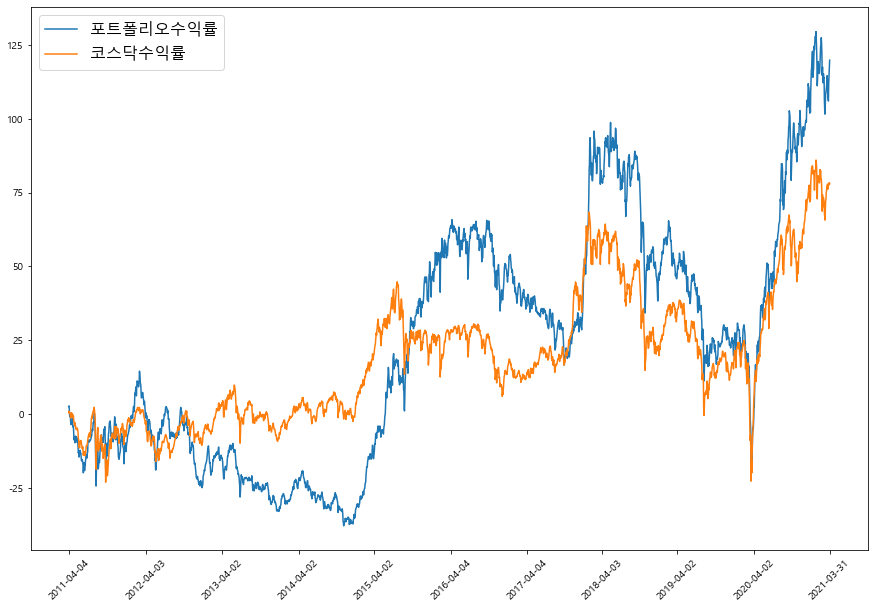

In [61]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,10))
plt.plot(stock_rtn_all["누적수익률(%)"],label='포트폴리오수익률')
plt.plot(stock_rtn_all["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,249,495,741,984,1231,1478,1719,1960,2208,2452], rotation=45)

plt.show()

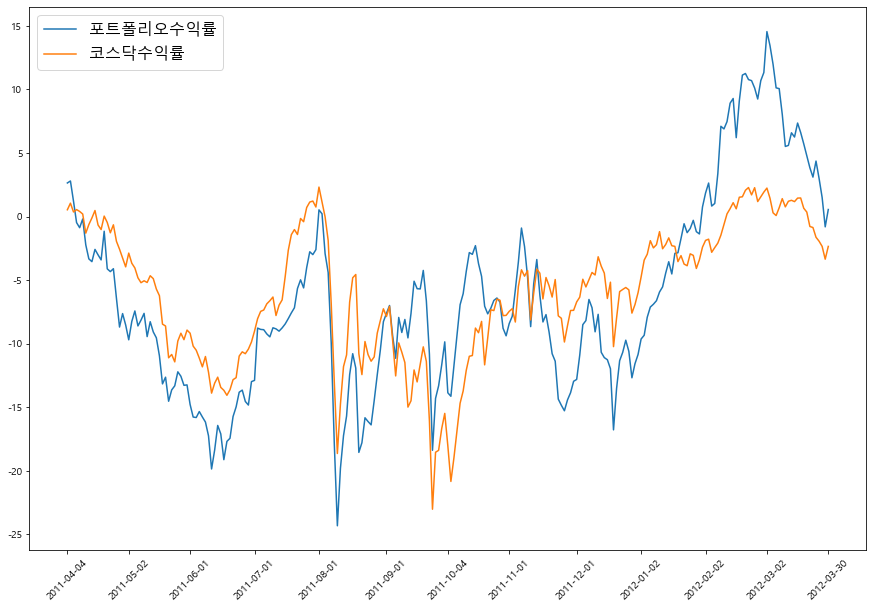

In [73]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2011["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2011["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,208,228,248], rotation=45)

plt.show()

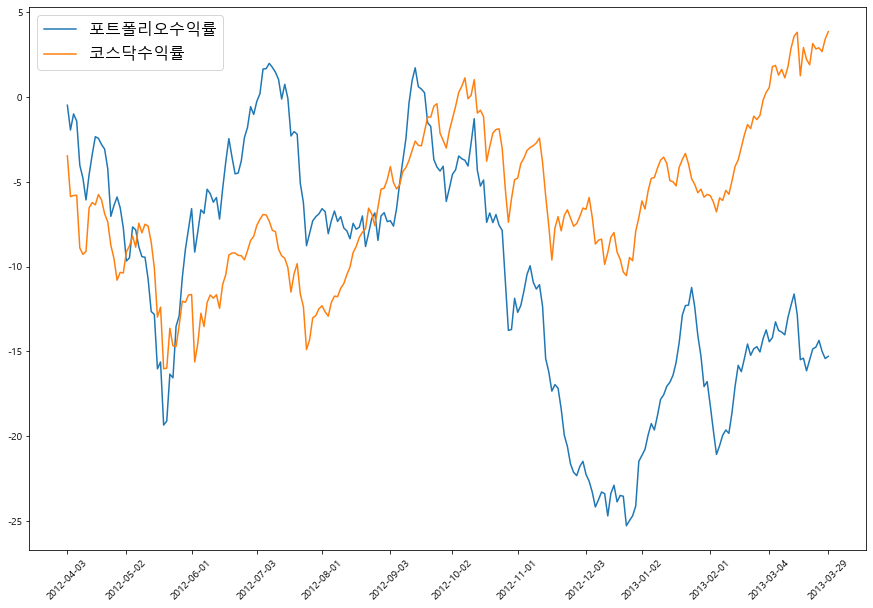

In [63]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2012["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2012["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,19,40,61,82,104,124,145,167,185,207,226,245], rotation=45)

plt.show()

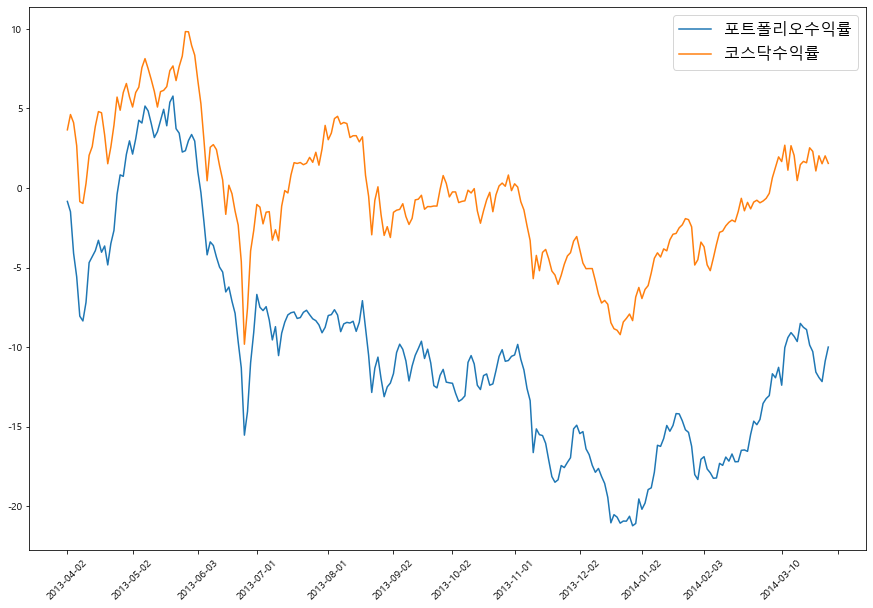

In [64]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2013["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2013["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,21,42,61,84,105,124,144,165,185,205,230,248], rotation=45)

plt.show()

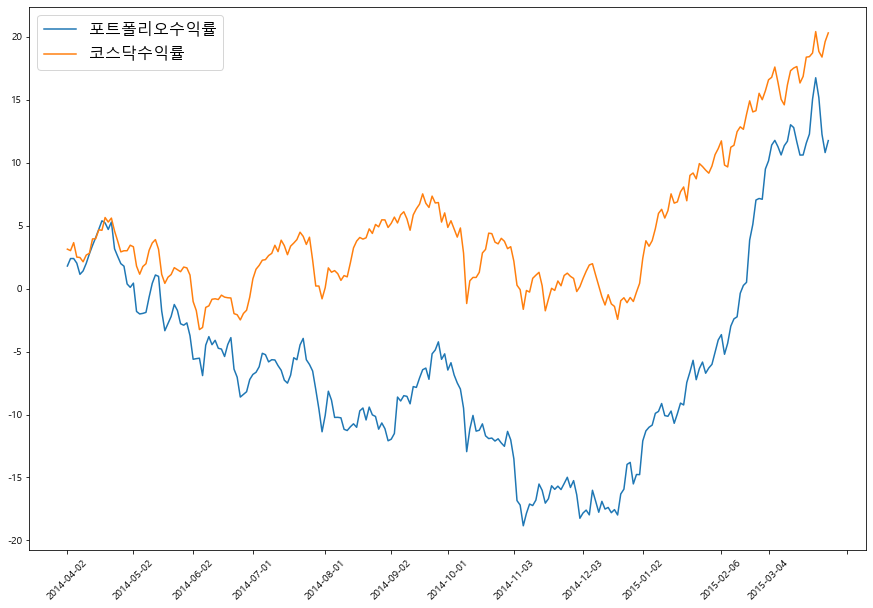

In [65]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2014["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2014["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,21,40,59,82,103,121,142,164,183,208,223,248], rotation=45)

plt.show()

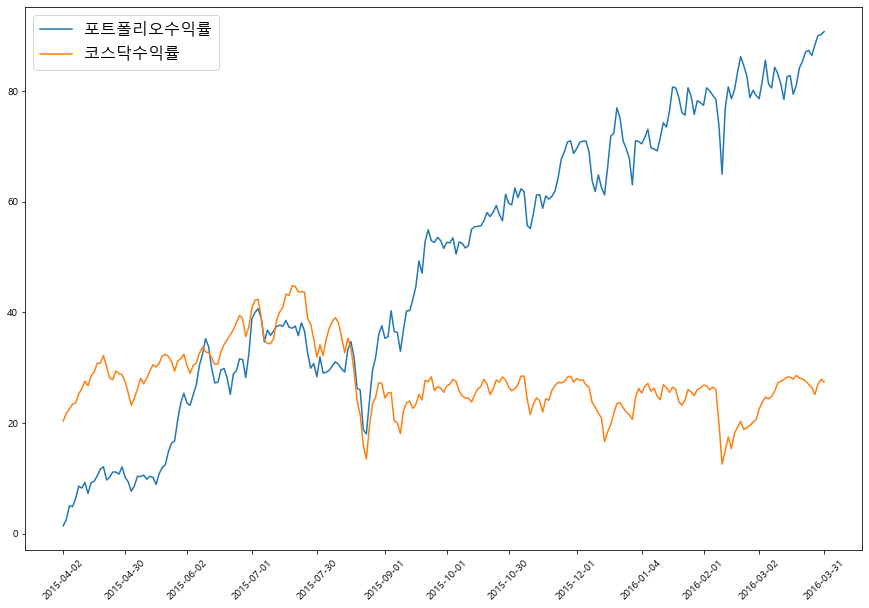

In [66]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2015["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2015["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,207,225,246], rotation=45)

plt.show()

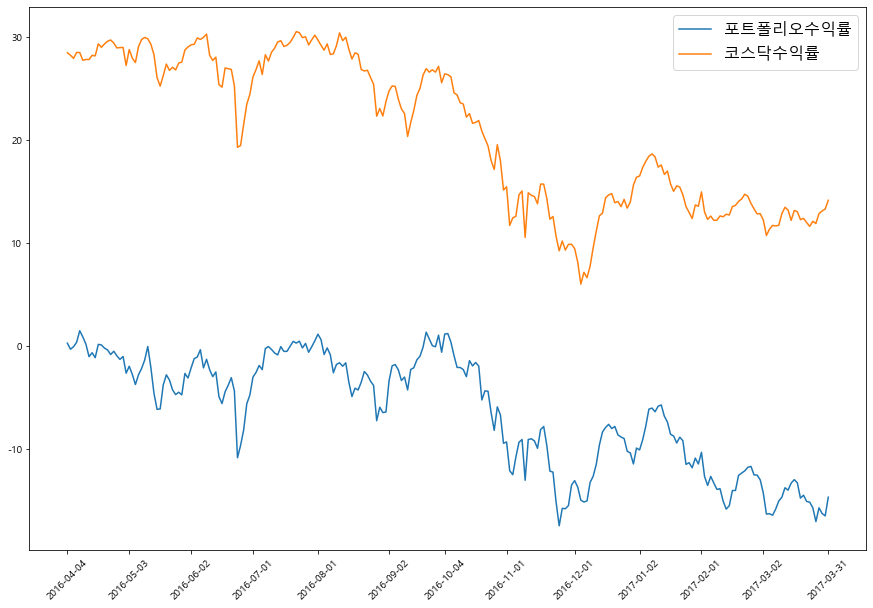

In [67]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2016["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2016["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,60,81,104,122,142,164,185,205,225,246], rotation=45)

plt.show()

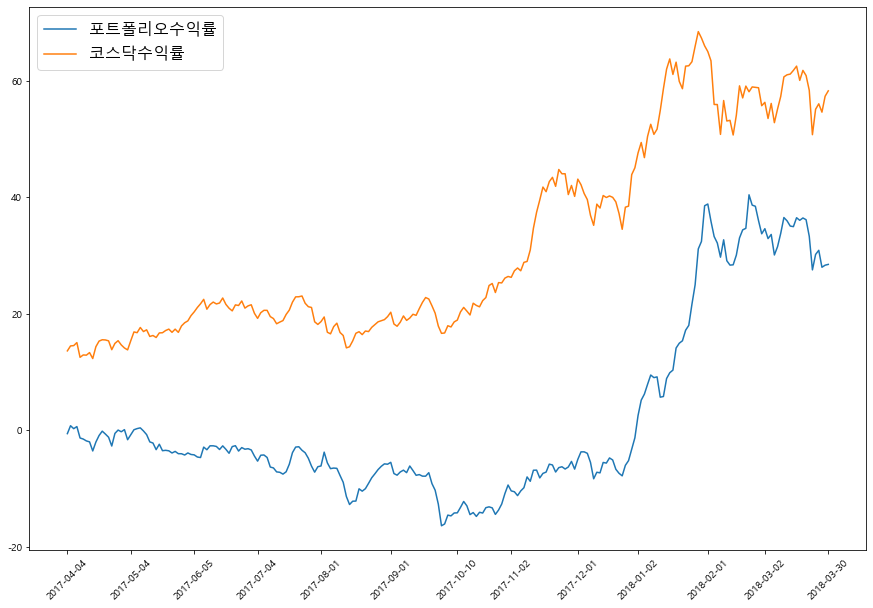

In [68]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2017["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2017["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,60,80,102,123,140,161,180,202,220,240], rotation=45)

plt.show()

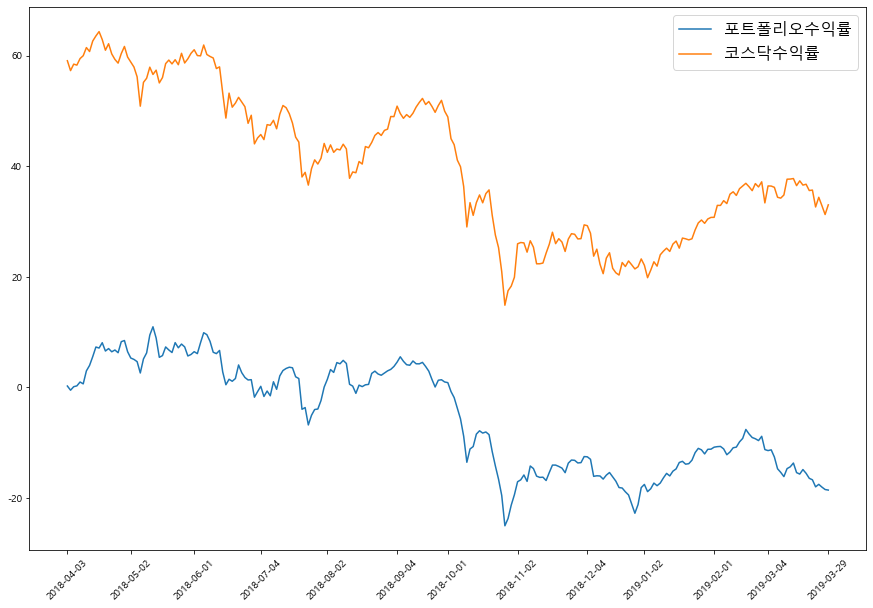

In [69]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2018["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2018["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,120,142,164,182,204,221,240], rotation=45)

plt.show()

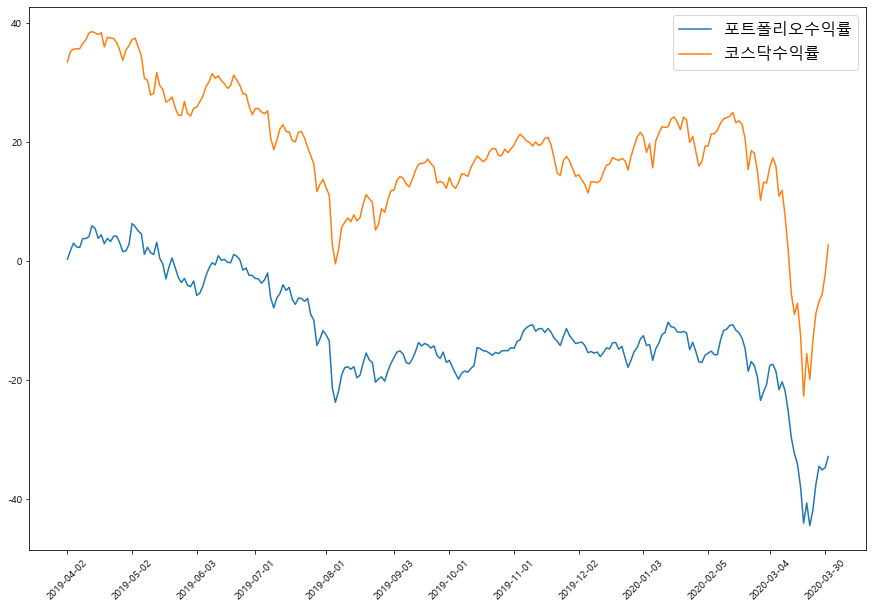

In [70]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2019["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2019["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,21,42,61,84,106,124,145,166,187,208,228,246], rotation=45)

plt.show()

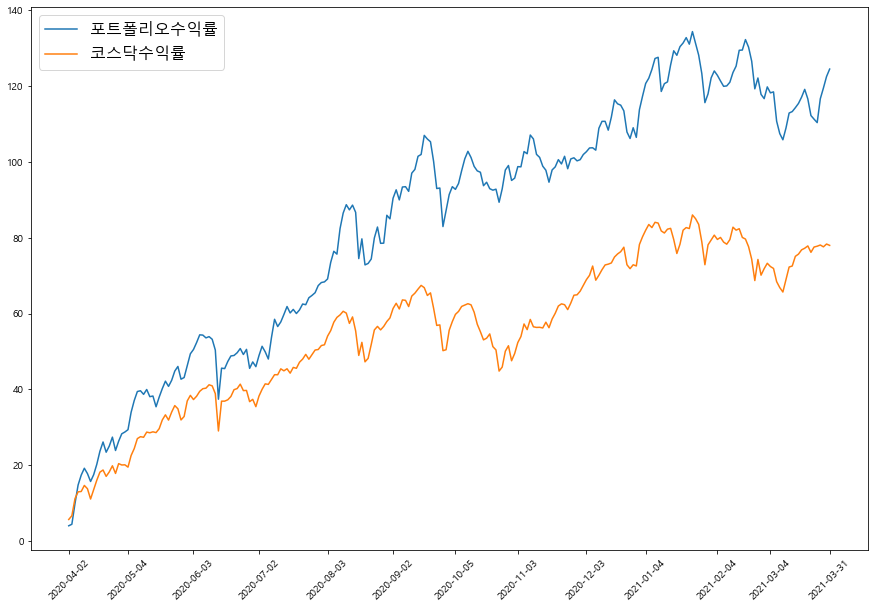

In [71]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2020["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2020["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,19,40,61,83,104,124,144,166,185,208,225,244], rotation=45)

plt.show()